<a href="https://colab.research.google.com/github/PrashantShrivastava1612/Global-Terrorism-Data-Analysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [13]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#installing basemap module which is no present in google colab by defalut
%pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#importing dataset
file_path = "/content/drive/MyDrive/Almabetter/Capstone Project/Global Terrorism Analysis/Global Terrorism Data.csv"
gt_df = pd.read_csv(file_path,encoding = "ISO-8859-1")

In [16]:
# This will allow the columns to be displayed. As there are 135 columns.
pd.set_option('display.max_columns', None)

# **Data Understanding**

In [17]:
# viewing the last 5 rows of the dataset
gt_df.tail() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [18]:
# view shape of the dataset
gt_df.shape

(181691, 135)

In [60]:
# view the information of the dataaset
gt_df.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    year                181691 non-null  int64  
 2    month               181691 non-null  int64  
 3    day                 181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_name        181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region              181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [20]:
# view the statistical information of the dataset using describe
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

some false values are present in the data like 0 in month and day column, outliers can also be seen  in both ends.

In [21]:
# see the column names of the dataset
print(gt_df.columns)      

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [22]:
# see the number of missing value in the columns
pd.DataFrame(gt_df.isna().sum().sort_values( ascending = False))

,0
gsubname3,181671
weapsubtype4_txt,181621
weapsubtype4,181621
weaptype4,181618
weaptype4_txt,181618
...,...
suicide,0
success,0
crit3,0
property,0


In [23]:

# check percentage  of null value in the dataframe  
pd.DataFrame((gt_df.isna().sum()/len(gt_df)*100).sort_values(ascending = False)).T

,gsubname3,weapsubtype4_txt,weapsubtype4,weaptype4,weaptype4_txt,claimmode3,claimmode3_txt,gsubname2,claim3,guncertain3,gname3,divert,attacktype3,attacktype3_txt,ransomnote,ransompaidus,ransomamtus,claimmode2,claimmode2_txt,ransompaid,corp3,targsubtype3,targsubtype3_txt,natlty3_txt,natlty3,target3,targtype3,targtype3_txt,ransomamt,weapsubtype3_txt,weapsubtype3,weaptype3_txt,weaptype3,claim2,guncertain2,gname2,resolution,kidhijcountry,nhours,compclaim,gsubname,attacktype2,attacktype2_txt,ndays,approxdate,corp2,nreleased,targsubtype2,targsubtype2_txt,natlty2,natlty2_txt,hostkidoutcome_txt,hostkidoutcome,target2,targtype2_txt,targtype2,weapsubtype2,weapsubtype2_txt,weaptype2,weaptype2_txt,nhostkidus,nhostkid,claimmode_txt,claimmode,related,addnotes,alternative,alternative_txt,propvalue,scite3,motive,location,propcomment,propextent,propextent_txt,scite2,ransom,nperps,nperpcap,nwoundte,weapdetail,nkillter,scite1,summary,claimed,nwoundus,nkillus,corp1,weapsubtype1,weapsubtype1_txt,nwound,targsubtype1,targsubtype1_txt,nkill,longitude,latitude,natlty1,natlty1_txt,target1,city,provstate,guncertain1,ishostkid,specificity,doubtterr,multiple,crit1,iyear,iday,imonth,targtype1_txt,gname,individual,dbsource,country,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,extended,region_txt,country_txt,region,crit2,targtype1,weaptype1,weaptype1_txt,attacktype1_txt,attacktype1,vicinity,suicide,success,crit3,property,eventid
0,99.988992,99.961473,99.961473,99.959822,99.959822,99.926799,99.926799,99.911938,99.824978,99.823877,99.821675,99.821675,99.764435,99.764435,99.717102,99.696187,99.690133,99.660963,99.660963,99.574002,99.435305,99.396228,99.396228,99.368708,99.368708,99.353298,99.352747,99.352747,99.25698,99.068198,99.068198,98.974633,98.974633,98.959772,98.923997,98.892075,98.778145,98.180978,97.763786,97.336687,96.758232,96.524869,96.524869,95.528672,94.914993,94.431755,94.275996,94.119136,94.119136,94.040431,94.040431,93.950719,93.950719,93.934757,93.86651,93.86651,93.647456,93.647456,92.775096,92.775096,92.560446,92.530175,89.497003,89.497003,86.219461,84.430159,84.032781,84.032781,78.541039,76.049447,72.171984,69.456385,68.100236,64.739585,64.739585,57.657231,57.410659,39.140629,38.245703,38.05527,37.244553,36.852678,36.430533,36.396409,36.391456,35.61101,35.470111,23.418882,11.430396,11.430396,8.97733,5.709144,5.709144,5.67612,2.508104,2.507554,0.85805,0.85805,0.350045,0.238867,0.231712,0.209146,0.097969,0.003302,0.00055,0.00055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Most of the columns have null values here.  columns have highly variable null value, some have nearly 99% null values null counts varying from 99% to 1%, so  will use only few important features

In [24]:
# see the top 5 rows of the dataset
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [25]:
#selecting only those columns which are usefull and dont have high number of null values

gt_df.rename(columns = {"attacktype1_txt":'attack_type',"country_txt":'country_name',"iday":'day', "imonth":'month', "iyear":'year',"natlty1_txt":'nationality',
              "region_txt":'region',"targtype1_txt":'target',"weaptype1_txt":'weapon',"gname":'gang'}, inplace = True)
df = gt_df[['attack_type','city' ,'country_name' ,'gang' ,'day' ,'month' ,'year' 
            ,'nkill' ,'success' ,'nationality' ,'provstate' ,'region' ,'target1' 
            ,'target' ,'weapon' ,'latitude' ,'longitude']]
df.head(3)

,attack_type,city,country_name,gang,day,month,year,nkill,success,nationality,provstate,region,region,target1,target,weapon,latitude,longitude
0,Assassination,Santo Domingo,Dominican Republic,MANO-D,2,7,1970,1.0,1,Dominican Republic,NaN,2,Central America & Caribbean,Julio Guzman,Private Citizens & Property,Unknown,18.456792,-69.951164
1,Hostage Taking (Kidnapping),Mexico city,Mexico,23rd of September Communist League,0,0,1970,0.0,1,Belgium,Federal,1,North America,"Nadine Chaval, daughter",Government (Diplomatic),Unknown,19.371887,-99.086624
2,Assassination,Unknown,Philippines,Unknown,0,1,1970,1.0,1,United States,Tarlac,5,Southeast Asia,Employee,Journalists & Media,Unknown,15.478598,120.599741


# **EDA and Visualization**

## **Important insights to draw from the data**
#### Q1: Number of attack per year 
#### Q2: World Wide what are the major attack_types used?
#### Q3: Geographic Representation on Map, in which places attacks have been done since 1970
#### Q4: Top 6 highly attacked regions in india with different attack types
#### Q5: Weapon used per Attacktype in India
#### Q6: Number of attacks per attack type in top 10 most attacked countries ?
#### Q7: Terrorist group attacking most number of times?
#### Q8: Statewise Attacks in India
#### Q9: What most of the Addnotes say?

<!-- # Q1: Number of attack per year 
# Q2: World Wide what are the major attack_types used?
# Q3: Geographic Representation on Map, in which places attacks have been done since 1970
# Q4: Top 6 highly attacked regions in india with different attack types
# Q5: Weapon used per Attacktype in India
# Q6: Number of attacks per attack type in top 10 most attacked countries ?
# Q7: Terrorist group attacking most number of times? -->

## Number of attack per year

In [26]:
#group by year 
Atk_pr_yr = df.groupby(['year'])['year'].count()

<AxesSubplot:title={'center':'Number of attack per year'}, xlabel='Years', ylabel='Count of attack'>

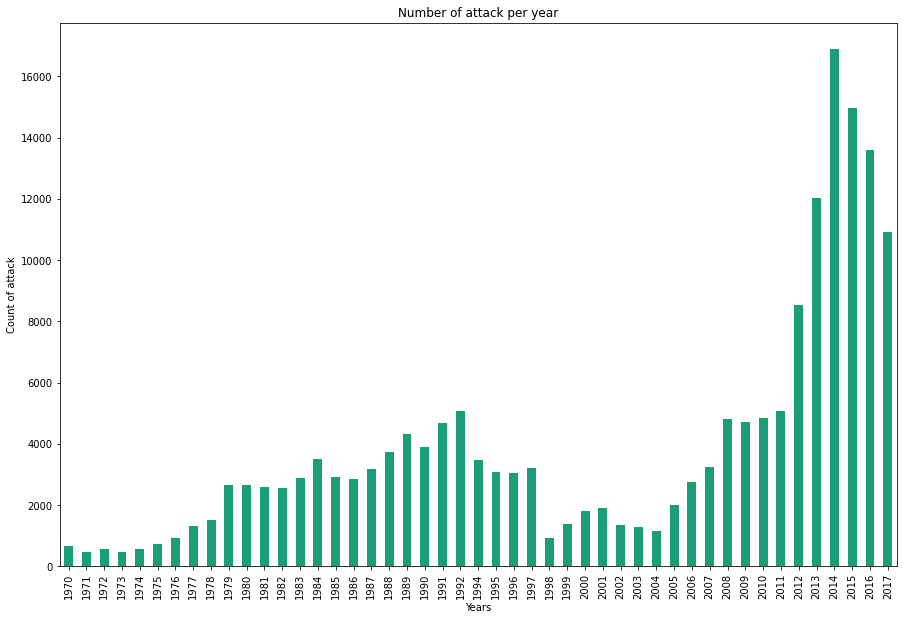

In [27]:
# plotting a bar graph
Atk_pr_yr.plot(kind='bar',stacked=True, colormap='Dark2',title='Number of attack per year',xlabel ='Years' ,ylabel = 'Count of attack', figsize=(15,10))

Highest number of attacks were done in 2014 that was more than 16000 followed by the year 2015 and 2016. Least number of attacks were done in 1973.

## World Wide what are the major attack_types used?

In [28]:
#groupby attacktype and count the values
Atk_typ = df.groupby(['attack_type'])['attack_type'].count()
Atk_typ 

attack_type
Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
Name: attack_type, dtype: int64

Text(0.5, 1.0, 'World wide Attack types')

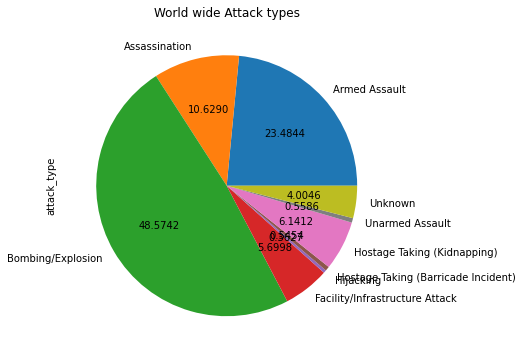

In [29]:
# Plotting a pie chart
Atk_typ.plot(kind = 'pie', figsize=(6,6), autopct = '%.4f')
plt.title('World wide Attack types') 

world-wide 48.57% attacks were of Bombing and Explosion followed by Armed Assault 23.48%  and 10% assassination. The least used attacktype are hostage Taking(Barricade Incident) and hijacking

## Geographic Representation on Map, in which places attacks have been done since 1970

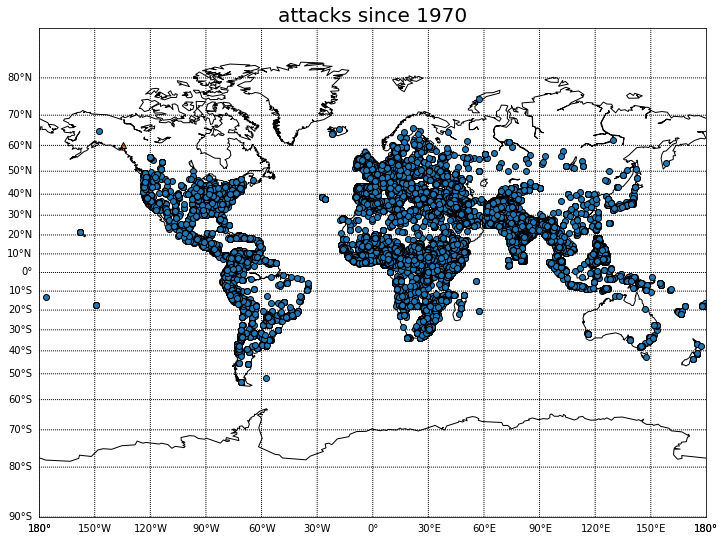

In [30]:
#!pip install basemap
# importing basemap and creating a map
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,9))

#creating a basemap object
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
# design map
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

#convert latitute and longitude to list
sites_lat_y = df['latitude'].tolist()
sites_lon_x = df['longitude'].tolist()

# plot the scatter with latitude and longitude values
m.scatter(sites_lon_x,sites_lat_y,latlon=True,  marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
m.scatter(-135,60,latlon=True, marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=1)
plt.title('attacks since 1970', fontsize=20)

plt.show()


From this map it can be assumed that countries like Greenland,Australia, sweden, norway, States of USA like Alaska, Northern Canada and north east of Russia are among very peaceful places throughout the world.

##Top 6 highly attacked states in india with different attack types

In [31]:
# find all rows with country india and group by states
prov_df = df.loc[df['country_name'] == 'India' ]
prov_df = prov_df.groupby(['provstate'])['provstate'].count().reset_index(name='count').sort_values(['count'],ascending = False).head(6)

In [32]:
#top 6 states attack-wise
prov_df.head(6)

,provstate,count
12,Jammu and Kashmir,2454
3,Assam,1151
18,Manipur,1100
6,Chhattisgarh,979
25,Punjab,949
13,Jharkhand,887


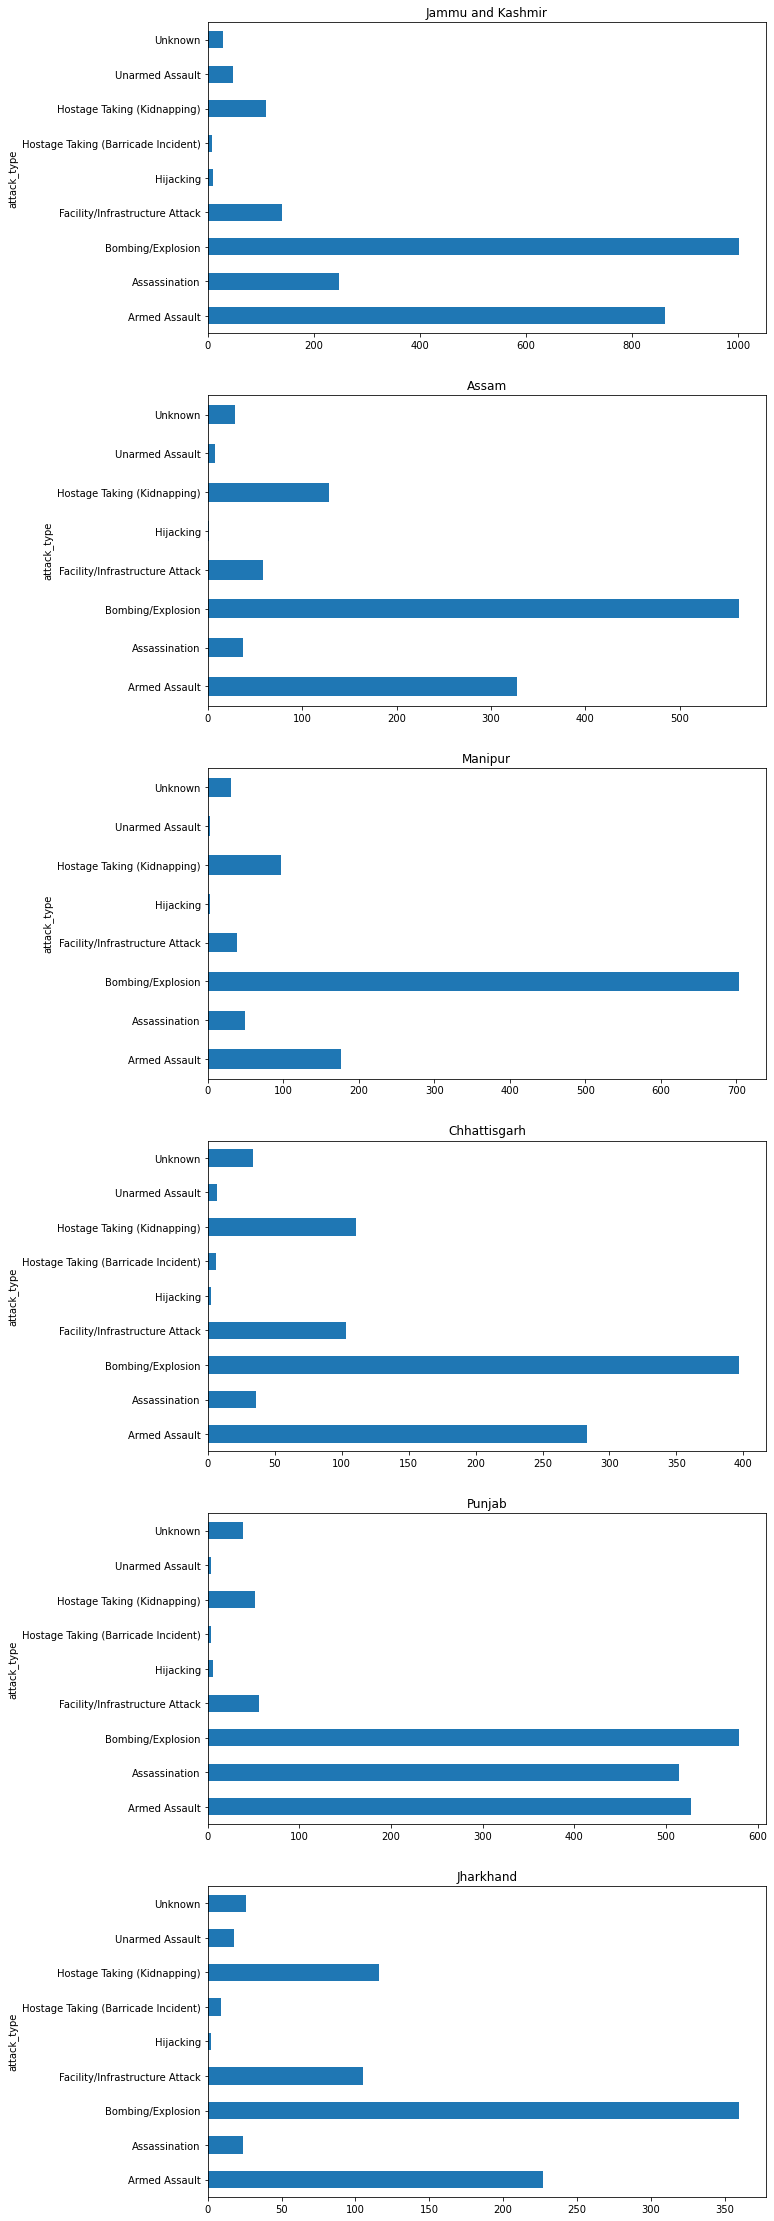

In [33]:
#plot highly attacked states
plt.figure(1)
count = 1
for prov in prov_df['provstate']:
  new_df = df.loc[df['provstate']==prov]
  Atk_typ = new_df.groupby(['attack_type'])['attack_type'].count()
  plt.subplot(6,1,count)
  plt.title(prov)
  Atk_typ.plot(kind = 'barh', figsize = (10,40))
  #Atk_typ.plot(kind = 'pie', figsize = (21,20), autopct = '%.4f', labeldistance= 1.2)  # uncomment line to create pie chart 
  count+=1 

These are the most attacked states in india from 1970. Jammu & Kashmir is leading this Index followed by Assam, manipur, chattishgarh, punjab and jharkhand. Attack type varies state to state again Bombing and Explosion being the most used.

## Weapon used per Attacktype in India

In [34]:
# in india what are the attacktype and corresponding weapons for those attacks have been used
ind = df.loc[df['country_name'] == 'India'].groupby(['attack_type', 'weapon']).size().reset_index()

#plot treemap using plotly
fig = px.treemap(ind, path=['attack_type', 'weapon'],
                 values=0,
                 color='weapon')
fig.show()

*In* India , mostly Explosives have been used in Bombing and Explosion being the highest attack type in india. Next is Armed Assault where Firearms are mostly used weapons others include Melee, Explosives and Incendiary.
Based on the treemap it can be said that Most preferred weapons are firearms apart from Bombing and explosion.

##Number of attacks per attack type in top 10 most attacked countries ?

---



In [35]:
#top 5 rows
df.head() 

,attack_type,city,country_name,gang,day,month,year,nkill,success,nationality,provstate,region,region,target1,target,weapon,latitude,longitude
0,Assassination,Santo Domingo,Dominican Republic,MANO-D,2,7,1970,1.0,1,Dominican Republic,NaN,2,Central America & Caribbean,Julio Guzman,Private Citizens & Property,Unknown,18.456792,-69.951164
1,Hostage Taking (Kidnapping),Mexico city,Mexico,23rd of September Communist League,0,0,1970,0.0,1,Belgium,Federal,1,North America,"Nadine Chaval, daughter",Government (Diplomatic),Unknown,19.371887,-99.086624
2,Assassination,Unknown,Philippines,Unknown,0,1,1970,1.0,1,United States,Tarlac,5,Southeast Asia,Employee,Journalists & Media,Unknown,15.478598,120.599741
3,Bombing/Explosion,Athens,Greece,Unknown,0,1,1970,NaN,1,United States,Attica,8,Western Europe,U.S. Embassy,Government (Diplomatic),Explosives,37.997490,23.762728
4,Facility/Infrastructure Attack,Fukouka,Japan,Unknown,0,1,1970,NaN,1,United States,Fukouka,4,East Asia,U.S. Consulate,Government (Diplomatic),Incendiary,33.580412,130.396361


In [36]:
# groupby country and attacktype and aggregate size
per_country_attack = df.groupby(['country_name','attack_type'])['attack_type'].size().reset_index(name='size')

In [37]:
# again group the per_country_attack and aggregate sum according to attacktype
attack = per_country_attack.groupby(['country_name','attack_type'])['size'].sum()

In [38]:
# get the sum of all attack in countries
nation_atk_count = {}
for country in list(per_country_attack['country_name']):
  if country not in nation_atk_count.values():
    nation_atk_count[country] = per_country_attack[per_country_attack['country_name'] == country]['size'].sum()
nation_atk_count = sorted(nation_atk_count.items(), key=lambda x:x[1], reverse = True)
sort_nation_atk_count = dict(nation_atk_count)
print(sort_nation_atk_count)


{'Iraq': 24636, 'Pakistan': 14368, 'Afghanistan': 12731, 'India': 11960, 'Colombia': 8306, 'Philippines': 6908, 'Peru': 6096, 'El Salvador': 5320, 'United Kingdom': 5235, 'Turkey': 4292, 'Somalia': 4142, 'Nigeria': 3907, 'Thailand': 3849, 'Yemen': 3347, 'Spain': 3249, 'Sri Lanka': 3022, 'United States': 2836, 'Algeria': 2743, 'France': 2693, 'Egypt': 2479, 'Lebanon': 2478, 'Chile': 2365, 'Libya': 2249, 'West Bank and Gaza Strip': 2227, 'Syria': 2201, 'Russia': 2194, 'Israel': 2183, 'Guatemala': 2050, 'South Africa': 2016, 'Nicaragua': 1970, 'Ukraine': 1709, 'Bangladesh': 1648, 'Italy': 1565, 'Greece': 1275, 'Nepal': 1215, 'Sudan': 967, 'Argentina': 815, 'Democratic Republic of the Congo': 775, 'Indonesia': 761, 'Germany': 735, 'Iran': 684, 'Kenya': 683, 'Burundi': 613, 'Mali': 566, 'Myanmar': 546, 'West Germany (FRG)': 541, 'Mexico': 524, 'Angola': 499, 'Japan': 402, 'Uganda': 394, 'Saudi Arabia': 371, 'Mozambique': 363, 'Cameroon': 332, 'Honduras': 323, 'Bolivia': 314, 'Ireland': 307,

In [39]:
# create a pivot table of country and attackwise sum
atk_df = per_country_attack[per_country_attack['country_name'].isin(list(sort_nation_atk_count.keys())[0:10])]
pivot = atk_df.pivot(index='country_name', columns='attack_type', values='size')
pivot

attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country_name,,,,,,,,,
Afghanistan,2877.0,954.0,6245.0,355.0,16.0,27.0,1011.0,73.0,1173.0
Colombia,1972.0,1343.0,3128.0,275.0,33.0,89.0,1058.0,14.0,394.0
El Salvador,2216.0,449.0,2055.0,194.0,NaN,117.0,154.0,1.0,134.0
India,3184.0,1229.0,4825.0,996.0,43.0,44.0,1184.0,143.0,312.0
Iraq,3155.0,1287.0,18286.0,154.0,13.0,24.0,946.0,6.0,765.0
Pakistan,3859.0,1406.0,7613.0,300.0,19.0,35.0,823.0,77.0,236.0
Peru,1328.0,1002.0,3115.0,223.0,8.0,74.0,97.0,4.0,245.0
Philippines,2158.0,1099.0,2213.0,452.0,34.0,53.0,602.0,4.0,293.0
Turkey,1289.0,437.0,1957.0,279.0,13.0,13.0,158.0,10.0,136.0


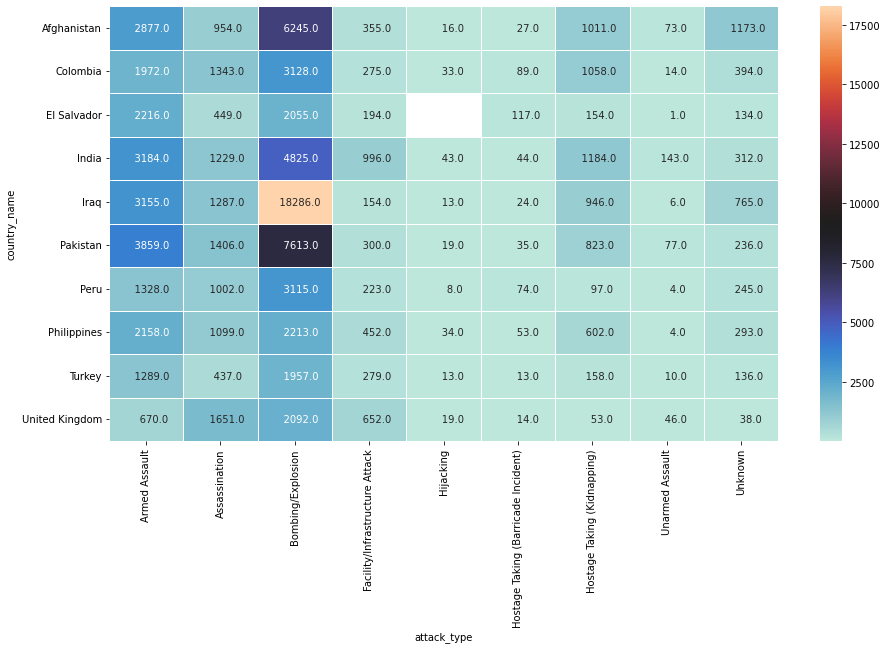

In [40]:
# plot a heatmap
fig, ax = plt.subplots(figsize=(15,8))
atk_map = sns.heatmap(pivot,annot=True,linewidths=1, linecolor = 'white', cmap="icefire" ,ax=ax,fmt="10")  
plt.show()

In these Top 10 Most Attacked Countries Iraq was enormously attacked by Bombing and Explosions outreaching the sum of any two attack_types throughout the globe.it was attacked 18000+ times by bombing. Second name is of pakistan Again in Bombing and explosion followed by pakistan.
If we compare the attack type used in these top 10 highest attacked countries ranking would be(1: Bombing/Explosion, 2:Armed Assault, 3: Assassination)


## Terrorist group attacking most number of times?

In [41]:
# top 2 rows
df.head(2)

,attack_type,city,country_name,gang,day,month,year,nkill,success,nationality,provstate,region,region,target1,target,weapon,latitude,longitude
0,Assassination,Santo Domingo,Dominican Republic,MANO-D,2,7,1970,1.0,1,Dominican Republic,NaN,2,Central America & Caribbean,Julio Guzman,Private Citizens & Property,Unknown,18.456792,-69.951164
1,Hostage Taking (Kidnapping),Mexico city,Mexico,23rd of September Communist League,0,0,1970,0.0,1,Belgium,Federal,1,North America,"Nadine Chaval, daughter",Government (Diplomatic),Unknown,19.371887,-99.086624


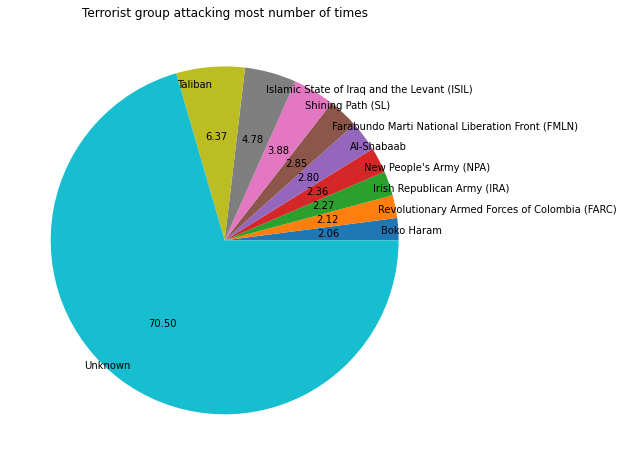

In [42]:
# Group by gang and see frequency
new = df.groupby(['gang'])['gang'].count().reset_index(name='count').sort_values(['count']).tail(10)
plt.figure(figsize = (8,8))
plt.title('Terrorist group attacking most number of times')
plt.pie(new['count'],labels= new['gang'] , autopct = '%.2f', labeldistance=0.9)
#plt.legend()
plt.show()

Worldwide nearly 70.50 Attacks were done by unknown Groups. 
If we talk about grouped attacks the highest known active terrorist group is Taliban undertking 6.37% of global attacks followed by ISIL, and Shining Path(SL) group

## Statewise Attacks in India

In [43]:
# inatalling geopandas module for visualizing india map for attack counts
%pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 30.2 MB/s eta 0:00:00


In [48]:
# getting necessary shp file from drive
shp_gdf = gpd.read_file('/content/drive/MyDrive/Almabetter/Capstone Project/Global Terrorism Analysis/Shapefile (imp for EDA)/India_State_Boundary.shp')
shp_gdf.reset_index(inplace=True)
shp_gdf.sort_values('Name', inplace = True)

In [49]:
# group by provstate
states_count = df.groupby(['provstate'])['provstate'].count()
states_count = states_count.to_frame()


In [50]:
# rename provstate as state for better readibility and unerstanding
states_count.rename(columns={'provstate':'State','provstate':'Values'}, inplace=True)
states_count.head()

,Values
provstate,
(Region) of Republican Subordination (Province),1
(Republic of) Ingushetia,1
A Coruna,5
Aargau,4
Abia,13


In [51]:
 # creating a list of count of attack and add it in shp_gdf dataframe
 num_of_attacks = [0,292,24,1151,688,47,979,0,208,5,85,50,24,2454,887,71,98,2454,0,75,302,1100,294,27,115,649,2,949,43,4,164,24,117,201,24,650] 

In [52]:
shp_gdf['Attacks']=num_of_attacks
shp_gdf.head() 

,index,Name,Type,geometry,Attacks
1,1,Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",0
16,16,Andhra Pradesh,State,"POLYGON ((84.67571 19.16721, 84.67725 19.16670...",292
26,26,Arunachal Pradesh,State,"POLYGON ((96.08538 29.45928, 96.09262 29.45613...",24
25,25,Assam,State,"POLYGON ((93.24961 24.97312, 93.25244 24.97428...",1151
32,32,Bihar,State,"POLYGON ((84.10880 27.52173, 84.10896 27.52131...",688


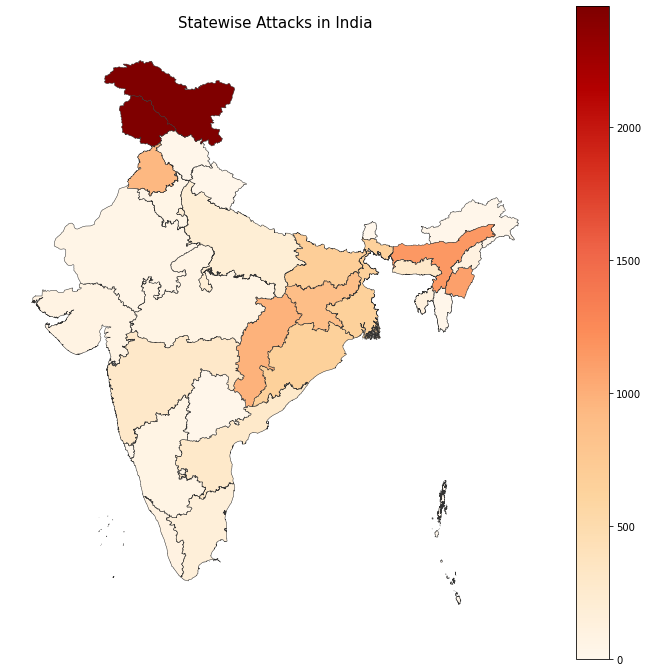

In [53]:
# creating a map for density of attacks
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Statewise Attacks in India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = shp_gdf.plot(column='Attacks', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

 this map itself represents the attacks all over the country along with its density.. also it can be seen that states like goa, karnataka, madhya-pradesh, talangana, arunachal pradesh, uttarakhand, himachal pradesh are least attacked states.
 thus they are safest states to live in india in against terrorism 

## What most of the addnotes say?

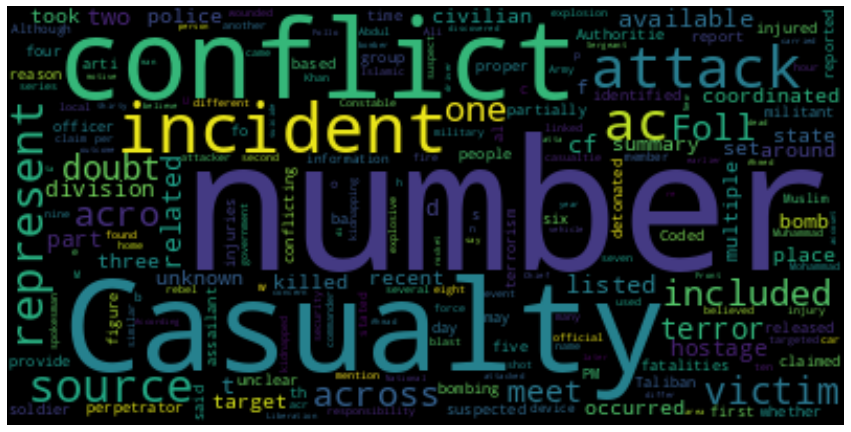

In [54]:
# get addnote data where null value are not present
txt_col = gt_df[gt_df['addnotes'].isna() == False]['addnotes']

text = ''
for n in range(len(txt_col)):
  text = text+' '.join(str(txt_col.iloc[n:n+1]).split())

text = text.replace('Name: addnotes, dtype: object',' ')
text = text.replace('...',' ')
text = text.replace('  ',' ')
text = text.replace(',','')
text = text.replace('.',' ')

# create a wordcloud
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

# show wordcloud
plt.figure(figsize = (15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

addnotes were the notes regarding the attacs by the media or the journalists. so most of the time casuality, number, conflict, incident, represent, source, victim word have been used.
they by themselve represents that mostly the concern is about the number of casualities in the attacks or conflicts, about the victim and source of the attack.

# **Conclusion**

* Based on the whole EDA it can be suggested that the attacks from 1970 were in 
huge number.
* Further steps can be taken to reduce the effect of terrorism like.
* Paying special attention to Highly attack prone regions.
* Strong regulation and inspection can be made on Explosions as they are most frequent and common attack types.
* Strong Terror Groups like Taliban, ISIL, Shining Path must be Investigated regularly.
* In India North and East part is highly terror prone Area so that must be protected properly.
* There must be ban on explosive compounds and their manufacturing units must be proper monitored.
* There must be some terror intelligence unit to regularly test suspicious situations in Prone areas.
* As Hostage Taking is also one of the major attack type, As a preventive measure government must introduce some training to common citizens to handle suspicious conditions.
* Number of Unknown attacks are the highest of all time, possible reason behind this maybe:
* Naxalites and other local terror groups attacked for temporary causes.
Large terror group attacked but did not acceped.
* Few countries like iran, syria, afganistan are very highly attacked nations, citizen of those countries are suffering from high violence. Some of those countries are controlled by terror groups thus UN must create some special forces to defend terror groups in these small and weak nations.


